In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_classification

import matplotlib.pyplot as plt

In [2]:
def distance_metric(x1, x2, dist_type='euclidean'):
    if dist_type == 'euclidean':
        X = np.array(x1) - np.array(x2) 
        dist = np.sqrt(np.sum(X**2))
    return dist

In [3]:
x1 = np.array([1, 1])
x2 = np.array([2, 3])
distance_metric(x1, x2)

2.23606797749979

In [4]:
class KnnClassifier:
    def __init__(self, X, y, k_neighbors):
        self.X = np.array(X)
        self.y = np.array(y)
        self.k_neighbors = k_neighbors
    
    def __repr__(self):
        return f'KnnClassifier({self.k_neighbors})'
    
    def predict(self, new_x):
        self.new_x = new_x
        
        pred_y = []
        
        for i in self.new_x:
            dists = {ind: distance_metric(x, i) for ind, x in enumerate(self.X)}
            nearest_neighbors = sorted(dists, key=dists.get)[0:self.k_neighbors]  
            target_neighbors = self.y[nearest_neighbors]
            labels, counts = np.unique(target_neighbors, return_counts=True)
            pred_y.append(labels[counts.argmax()])
        
        self.pred_y = pred_y
        
        return pred_y
    
    def plot_2d(self, x1=0, x2=1):
        plt.scatter(self.new_x[:, x1], self.new_x[:, x2], c=self.pred_y, alpha=0.1)
        plt.scatter(self.X[:, x1], self.X[:, x2], c=y)
        plt.show()

In [5]:
X, y = make_blobs(n_samples=100, n_features=2, centers=5, random_state=42)
X = StandardScaler().fit_transform(X)
# X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2,
#                            n_classes=2, random_state=42)

In [6]:
X[:,0].shape

(100,)

In [8]:
X.shape

(100, 2)

In [10]:
x_linspace = []
for i in range(X.shape[1]):
    min_, max_ = min(X[:,i]), max(X[:,i])
    x_linspace.append(np.linspace(min_, max_, num = 40))

x_linspace[0]

# new_x = [[one, two, three, four] for one in x_linspace[0] for two in x_linspace[1] for three in x_linspace[2] for four in x_linspace[3]]
new_x = [[one, two] for one in x_linspace[0] for two in x_linspace[1]]

In [11]:
new_x

[[-1.541391334069961, -2.050147008730287],
 [-1.541391334069961, -1.9622496131441436],
 [-1.541391334069961, -1.874352217558],
 [-1.541391334069961, -1.7864548219718566],
 [-1.541391334069961, -1.698557426385713],
 [-1.541391334069961, -1.6106600307995695],
 [-1.541391334069961, -1.522762635213426],
 [-1.541391334069961, -1.4348652396272823],
 [-1.541391334069961, -1.346967844041139],
 [-1.541391334069961, -1.2590704484549953],
 [-1.541391334069961, -1.171173052868852],
 [-1.541391334069961, -1.0832756572827082],
 [-1.541391334069961, -0.9953782616965647],
 [-1.541391334069961, -0.9074808661104212],
 [-1.541391334069961, -0.8195834705242777],
 [-1.541391334069961, -0.7316860749381342],
 [-1.541391334069961, -0.6437886793519907],
 [-1.541391334069961, -0.5558912837658472],
 [-1.541391334069961, -0.46799388817970367],
 [-1.541391334069961, -0.38009649259356015],
 [-1.541391334069961, -0.29219909700741664],
 [-1.541391334069961, -0.20430170142127313],
 [-1.541391334069961, -0.116404305835

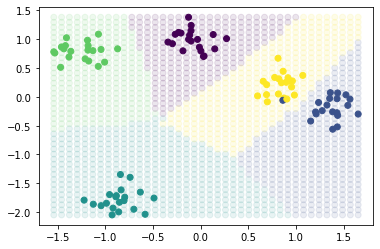

In [425]:
model = KnnClassifier(X, y, 5)
model.predict(np.array(new_x))
model.plot_2d()

In [433]:
class KnnRegressor:
    def __init__(self, X, y, k_neighbors):
        self.X = np.array(X)
        self.y = np.array(y)
        self.k_neighbors = k_neighbors
    
    def __repr__(self):
        return f'KnnClassifier({self.k_neighbors})'
    
    def predict(self, new_x):
        self.new_x = new_x
        
        pred_y = []
        
        for i in self.new_x:
            print(i)
            dists = {ind: distance_metric(x, i) for ind, x in enumerate(self.X)}
            print(dists)
            nearest_neighbors = sorted(dists, key=dists.get)[0:self.k_neighbors]  
            target_neighbors = self.y[nearest_neighbors]
            pred_y.append(np.mean(target_neighbors))
        
        self.pred_y = pred_y
        
        return pred_y
    
    def plot_2d(self, x_ind = 0):
        plt.scatter(self.new_x[:, x_ind], self.pred_y, alpha=0.1)
        plt.scatter(self.X[:, x_ind], self.y)
        plt.show()

In [435]:
X, y = make_regression(n_samples=10, n_features=1, random_state=42)
X = StandardScaler().fit_transform(X)

model = KnnRegressor(X, y, 5)
model.predict([[1, 2], [0.01, 5], [1, 1]])
model.plot_2d()

[1, 2]
{0: 0.7378907061808794, 1: 1.8501780842497504, 2: 4.074931687786503, 3: 1.6247680794869668, 4: 2.052152008080622, 5: 3.598055109488318, 6: 3.404459564746204, 7: 0.7134692228122258, 8: 2.14113700670998, 9: 3.5980882998431265}
[0.01, 5]
{0: 3.730289353548978, 1: 4.717337188138096, 2: 6.4794071633597925, 3: 4.557210398359419, 4: 4.8639061119296745, 5: 6.078187995241888, 6: 5.918345821074661, 7: 3.7694687780463676, 8: 4.929444078257015, 9: 6.078215558070002}
[1, 1]
{0: 0.9180159897766819, 1: 1.0026180339337327, 2: 3.306005260624216, 3: 0.7557231173730102, 4: 1.2193739127912897, 5: 2.8207821868671514, 6: 2.6231101679012916, 7: 0.8021769231885527, 8: 1.3138998198672374, 9: 2.820816037338257}


TypeError: list indices must be integers or slices, not tuple